In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
combined_city_ride_data = pd.merge(ride_data_to_load, city_data_to_load, on="city", how="left")
combined_city_ride_data = combined_city_ride_data[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
combined_city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

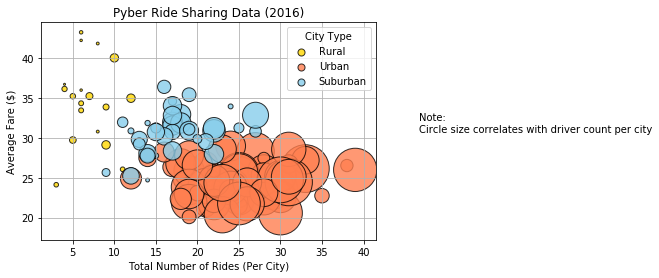

In [9]:
# Obtain the x and y coordinates for each of the three city types

city_ride = combined_city_ride_data.groupby(['city','type'])
#city_ride = combined_city_ride_data.groupby(['city']).get_group('type')

average_fare = city_ride['fare'].mean().reset_index()
ride_total = city_ride['ride_id'].count().reset_index()
driver_total = city_ride['driver_count'].sum().reset_index()


####
driver_total_r_true = driver_total.type == 'Rural'
driver_total_r = driver_total[driver_total_r_true]
average_fare_r = average_fare[driver_total_r_true]
ride_total_r = ride_total[driver_total_r_true]

driver_total_u_true = driver_total.type == 'Urban'
driver_total_u = driver_total[driver_total_u_true]
average_fare_u = average_fare[driver_total_u_true]
ride_total_u = ride_total[driver_total_u_true]

driver_total_s_true = driver_total.type == 'Suburban'
driver_total_s = driver_total[driver_total_s_true]
average_fare_s = average_fare[driver_total_s_true]
ride_total_s = ride_total[driver_total_s_true]

# Build the scatter plots for each city types

#colors = pd.DataFrame(["lightorange", "lightblue", "yellow"])
#original,  plt.scatter(ride_total.ride_id, average_fare.fare, c="red", alpha=.8, edgecolor="black", s=driver_total.driver_count)

plt.scatter(ride_total_r.ride_id, average_fare_r.fare, c="gold", alpha=.8, edgecolor="black", s=driver_total_r.driver_count, label=None)
plt.scatter(ride_total_u.ride_id, average_fare_u.fare, c="coral", alpha=.8, edgecolor="black", s=driver_total_u.driver_count, label=None)
plt.scatter(ride_total_s.ride_id, average_fare_s.fare, c="skyblue", alpha=.8, edgecolor="black", s=driver_total_s.driver_count, label=None)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


# Incorporate the other graph properties

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

# Create a legend

#urban = 
plt.scatter([], [], c='gold', alpha=0.8, s=50,edgecolor="black", label='Rural')
plt.scatter([], [], c='coral', alpha=0.8, s=50,edgecolor="black", label='Urban')
plt.scatter([], [], c='skyblue', alpha=0.8, s=50,edgecolor="black", label='Suburban')

#plt.legend(["Urban","Suburban","Rural"],title= 'City Type', scatterpoints=1)
plt.legend(title= 'City Type')

# Incorporate a text label regarding circle size
textstr = 'Note:\nCircle size correlates with driver count per city'
plt.figtext(1, .5, textstr)

# Save Figure

plt.savefig('PyberRideSharingData2016.png')

#plt.show()

## Total Fares by City Type

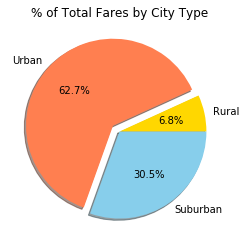

In [10]:
## Calculate Type Percents
total_fares = combined_city_ride_data.fare.sum()

rural_fares = combined_city_ride_data[combined_city_ride_data["type"] == "Rural"].fare.sum() / total_fares * 100
urban_fares = combined_city_ride_data[combined_city_ride_data["type"] == "Urban"].fare.sum() / total_fares * 100
suburban_fares = combined_city_ride_data[combined_city_ride_data["type"] == "Suburban"].fare.sum() / total_fares * 100


# Build Pie Chart
plt.title("% of Total Fares by City Type")
city_types = ["Rural", "Urban", "Suburban"]
city_type_fares_percentages = [rural_fares, urban_fares, suburban_fares]
colors = ["gold", "coral", "skyblue"]

shadow=True
explode=(0.0, 0.1, 0.0)

plt.pie(city_type_fares_percentages, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)

# Save Figure
plt.savefig('TotalFaresByCityType.png')






In [11]:
# Show Figure
plt.show()

## Total Rides by City Type

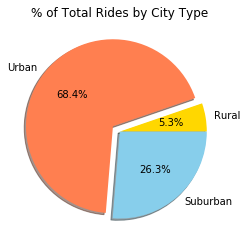

In [12]:
# Calculate Ride Percents
total_rides = combined_city_ride_data.ride_id.count()

rural_ride_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Rural"].ride_id.count() / total_rides * 100
urban_ride_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Urban"].ride_id.count() / total_rides * 100
suburban_ride_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Suburban"].ride_id.count() / total_rides * 100


# Build Pie Chart
plt.title("% of Total Rides by City Type")
city_types = ["Rural", "Urban", "Suburban"]
city_type_percentages = [rural_ride_percent, urban_ride_percent, suburban_ride_percent]
colors = ["gold", "coral", "skyblue"]

shadow=True
explode=(0.0, 0.1, 0.0)

plt.pie(city_type_percentages, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)

# Save Figure
plt.savefig('TotalRidesByCityType.png')

plt.show()







In [13]:
# Show Figure
plt.show()

## Total Drivers by City Type

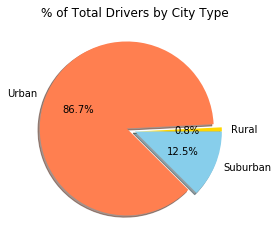

In [14]:
# Calculate Driver Percents

total_drivers = combined_city_ride_data.driver_count.sum()

rural_driver_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Rural"].driver_count.sum() / total_drivers * 100
urban_driver_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Urban"].driver_count.sum() / total_drivers * 100
suburban_driver_percent = combined_city_ride_data[combined_city_ride_data["type"] == "Suburban"].driver_count.sum() / total_drivers * 100


# Build Pie Chart
plt.title("% of Total Drivers by City Type")
city_types = ["Rural", "Urban", "Suburban"]
city_type_percentages = [rural_driver_percent, urban_driver_percent, suburban_driver_percent]
colors = ["gold", "coral", "skyblue"]

shadow=True
explode=(0.0, 0.1, 0.0)
#start_angle = 45

plt.pie(city_type_percentages, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=360)

# Save Figure
plt.savefig('TotalDriversByCityType.png')



In [15]:
# Show Figure
plt.show()